<a href="https://colab.research.google.com/github/nadiya-k-a/iris-dataset-visualisation/blob/main/Virtual_competition1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
##importing libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
##reading the training data into python environment
loan_train = pd.read_csv('/content/train vidya analytics.csv')

In [95]:
##reading the test data
loan_test= pd.read_csv('/content/test data vidya.csv')

In [96]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


loan_test.head()

In [97]:
loan_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [98]:
len(loan_train) ##to know how many records are in there

614

In [99]:
len(loan_train.columns) ##to know  how many features are in there

13

In [100]:
loan_train.describe() ##statistical information about data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## **Data Visualisation**

<Axes: >

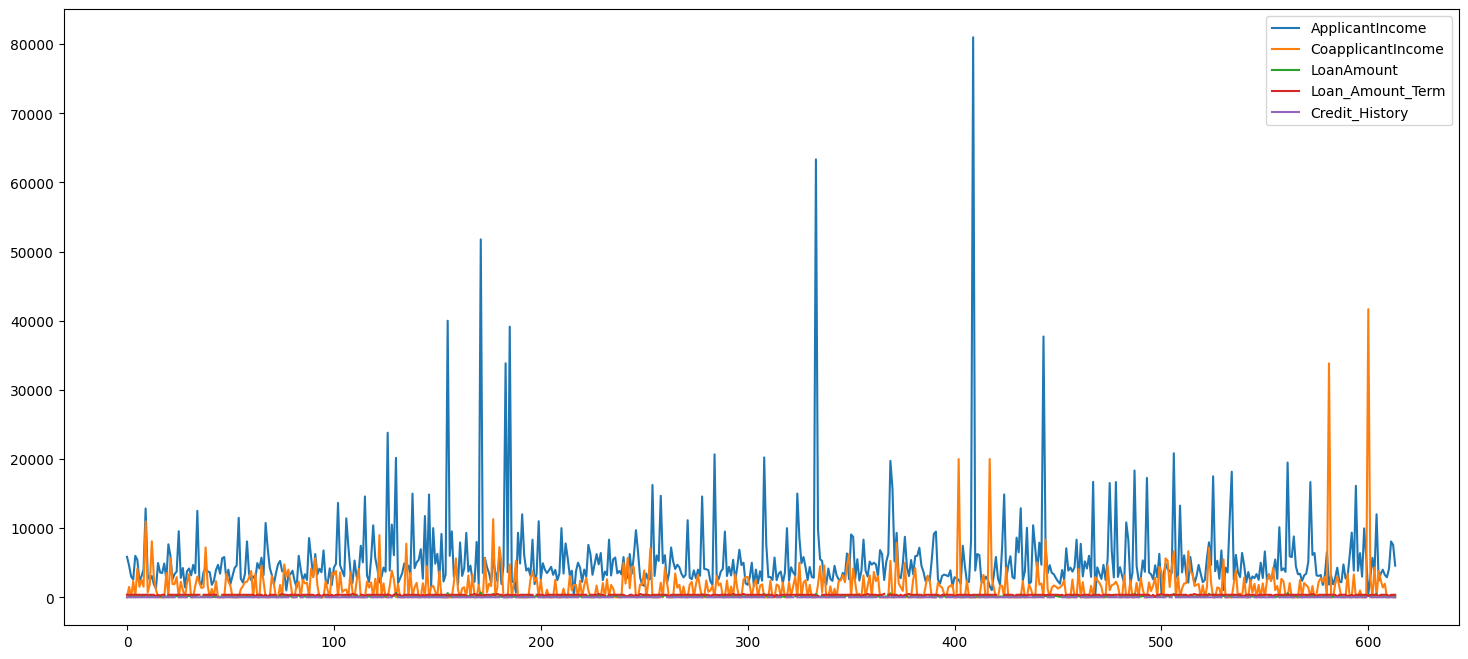

In [101]:
loan_train.plot(figsize=(18,8))

In [102]:
loan_train['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<Axes: title={'center': 'Loan Status'}>

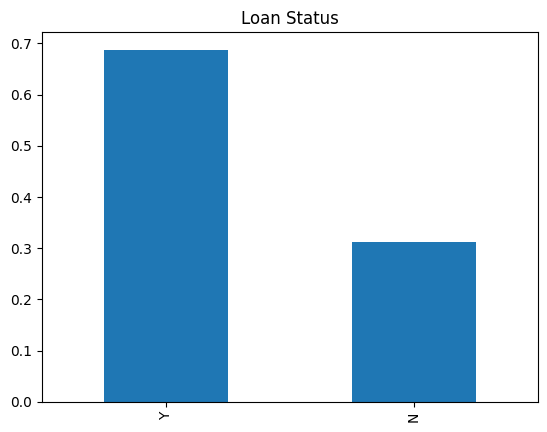

In [103]:
loan_train['Loan_Status'].value_counts(normalize = True).plot.bar(title='Loan Status')

The loan of around 69% people were approved

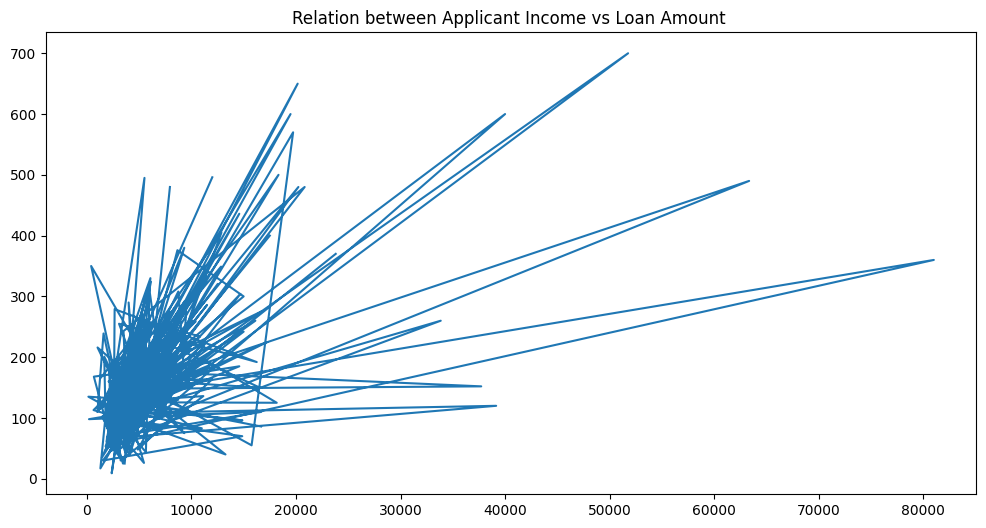

In [104]:
plt.figure(figsize=(12, 6))
plt.plot(loan_train['ApplicantIncome'], loan_train['LoanAmount'])
plt.title("Relation between Applicant Income vs Loan Amount ")
plt.show()

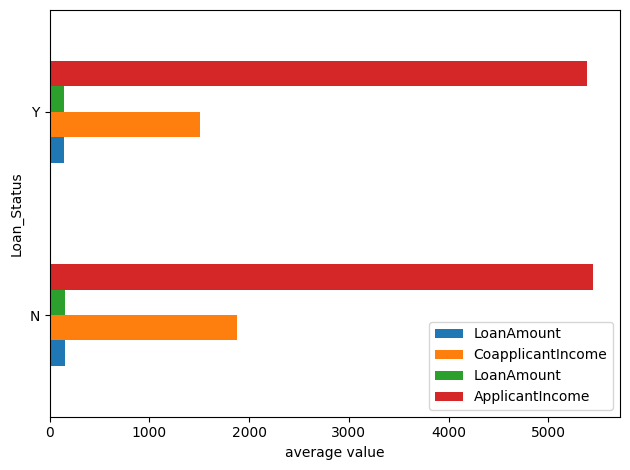

In [105]:
data=loan_train.groupby(['Loan_Status'])[['LoanAmount','CoapplicantIncome','LoanAmount','ApplicantIncome']].mean()

data.plot.barh()
plt.xlabel('average value')
plt.tight_layout()


There is nothing significant we can infer from above visulaisation

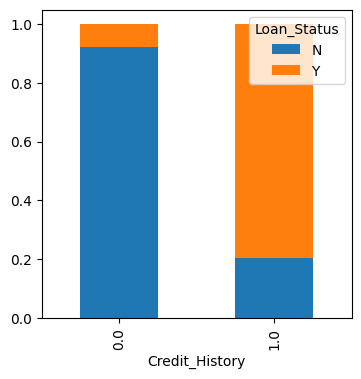

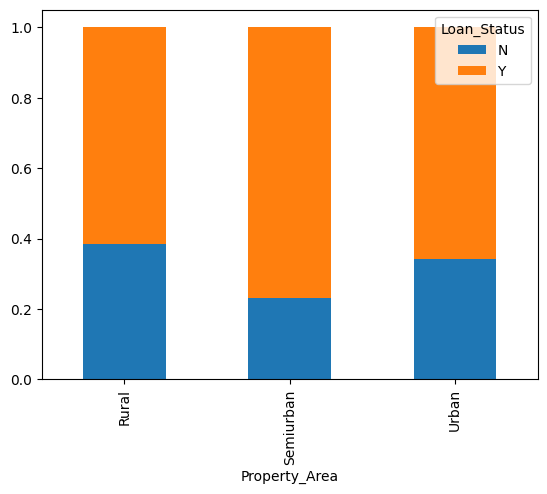

In [106]:
Credit_History=pd.crosstab(loan_train['Credit_History'],loan_train['Loan_Status'])
Property_Area=pd.crosstab(loan_train['Property_Area'],loan_train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.show()

It seems people with a credit history as 1 are more likely to  get their loans approved

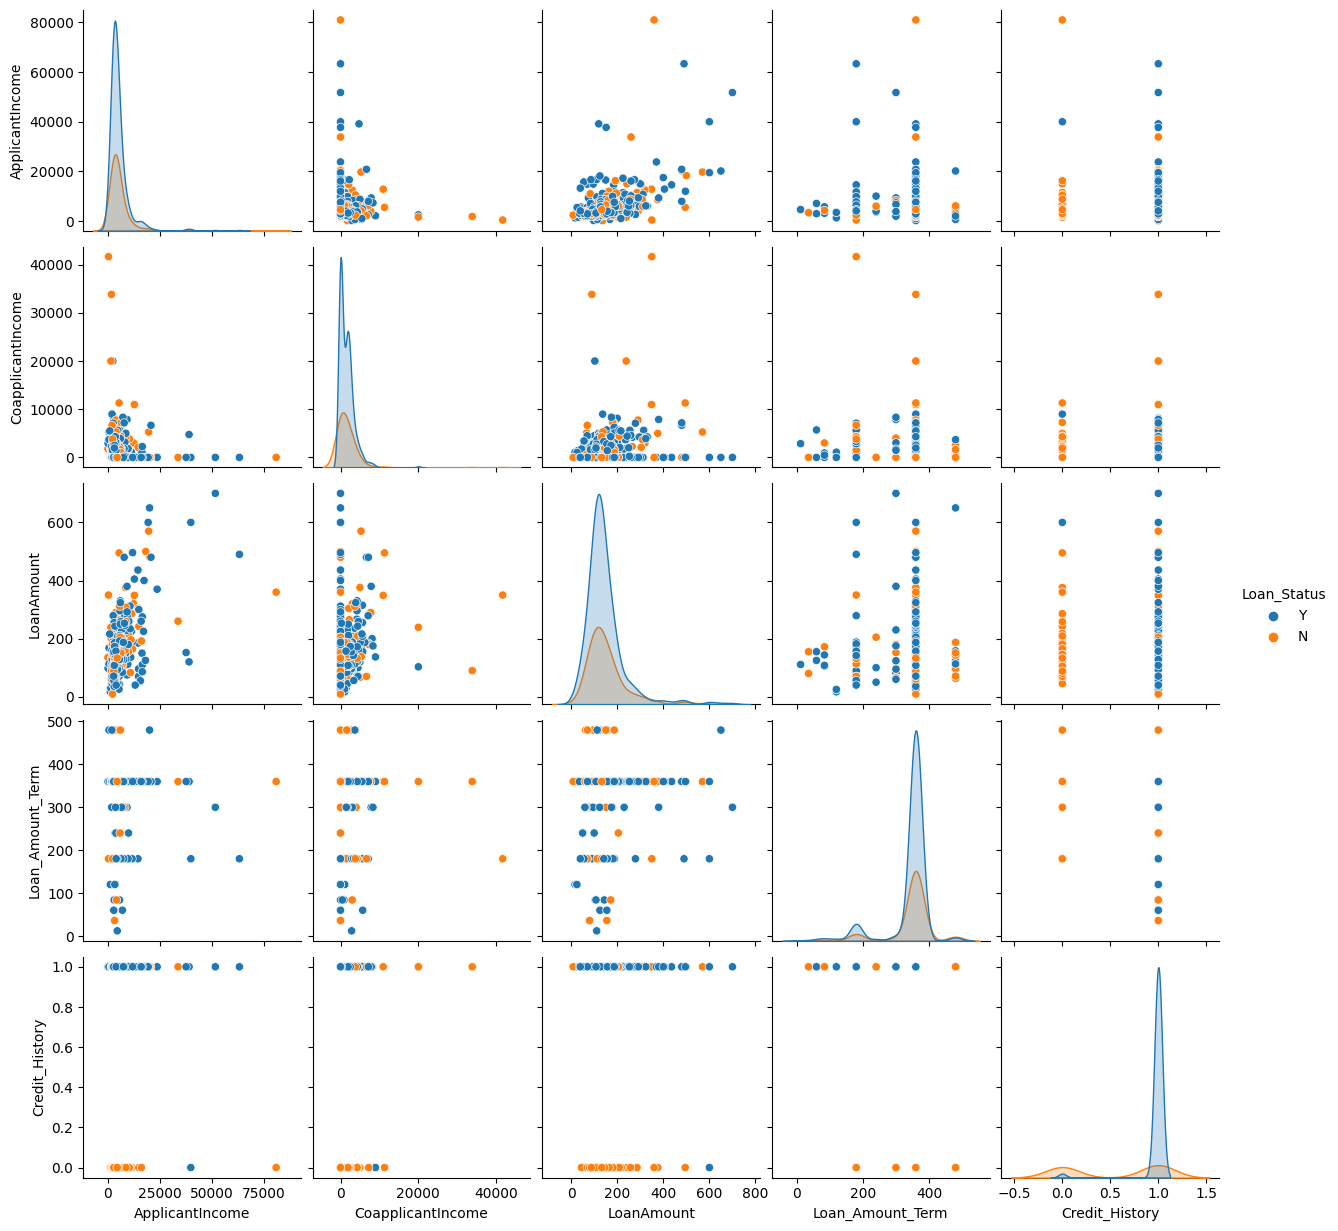

In [107]:
sns.pairplot(loan_train,hue ='Loan_Status')

<ipython-input-108-6349f3cba41a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(loan_train.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)


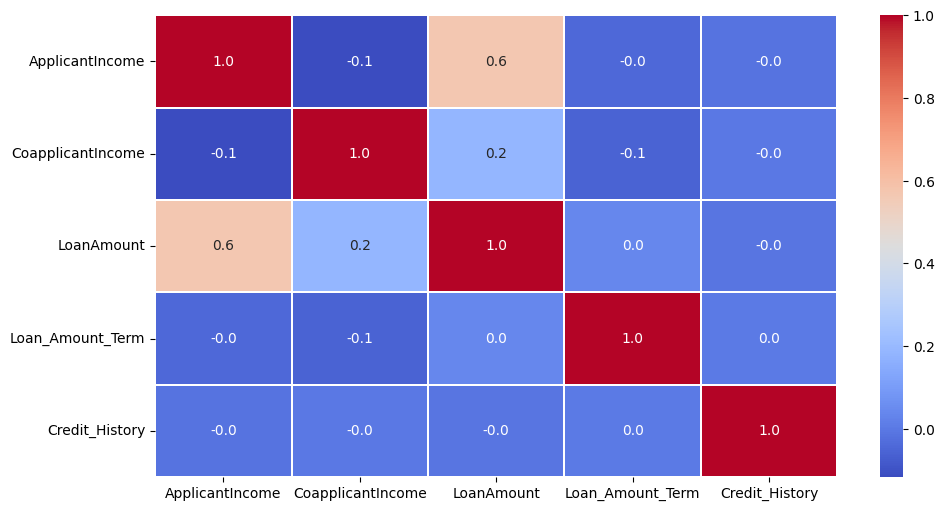

In [108]:
plt.figure(figsize=(11,6))
sns.heatmap(loan_train.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

Wecan see thatmost correlate variables are Applicant income-Loan Amount and credit_history - Loan status.Loan amount is also correlated with CoapplicantIncome

## **Missing value Imputation**

In [109]:
loan_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

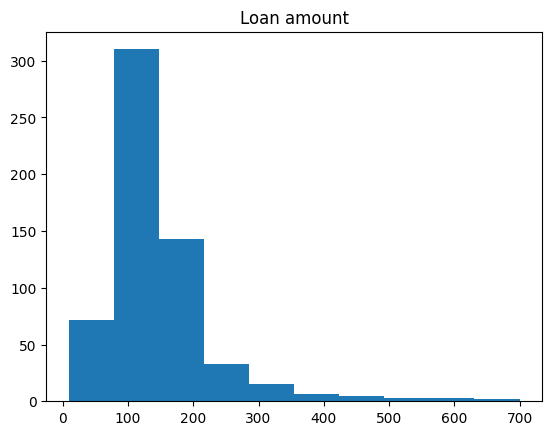

In [110]:
plt.hist(loan_train['LoanAmount'])## checking foe skewness
plt.title('Loan amount')
plt.show()

Because of skewed distribution median is to be used for imputation. For all other missing values we can use mode

In [111]:
##missing value imputation (test data set)
loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].median(),inplace = True)
loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)
loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)
loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)
loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].mode()[0], inplace=True)
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0], inplace=True)
loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mode()[0],inplace = True)

In [112]:
loan_train.isna().sum()## checking the output

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [113]:
loan_test['LoanAmount'].fillna(loan_test['LoanAmount'].median(),inplace = True)
loan_test['Gender'].fillna(loan_test['Gender'].mode()[0], inplace=True)
loan_test['Married'].fillna(loan_test['Married'].mode()[0], inplace=True)
loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0], inplace=True)
loan_test['Self_Employed'].fillna(loan_test['Self_Employed'].mode()[0], inplace=True)
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mode()[0], inplace=True)
loan_test['Loan_Amount_Term'].fillna(loan_test['Loan_Amount_Term'].mode()[0],inplace = True)

In [114]:
loan_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### **OUTLIER TREATMENT**

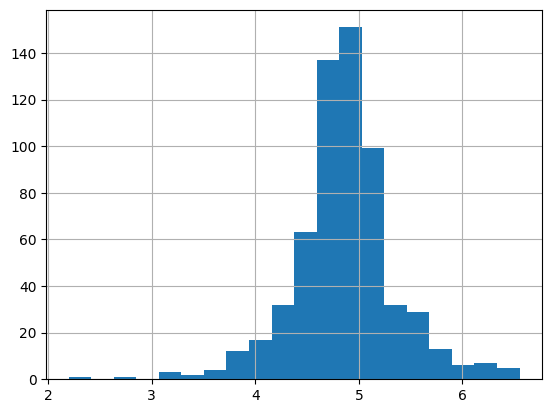

In [115]:
loan_train['LoanAmount_log']=np.log(loan_train['LoanAmount'])
loan_train['LoanAmount_log'].hist(bins=20)
loan_test['LoanAmount_log']=np.log(loan_test['LoanAmount'])

Distribution look so much closer to normal and the effect of extreme values has been significantly subbsided.

In [116]:
loan_train['Married'] = loan_train['Married'].replace({'Yes': 1, 'No': 0})
loan_train['Self_Employed'] = loan_train['Self_Employed'].replace({'Yes': 1, 'No': 0})
loan_train['Loan_Status'] = loan_train['Loan_Status'].replace({'Y': 1, 'N': 0})

In [117]:
loan_test['Married'] =loan_test['Married'].replace({'Yes': 1, 'No': 0})
loan_test['Self_Employed'] = loan_test['Self_Employed'].replace({'Yes': 1, 'No': 0})

In [153]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
loan_train['Gender']=le.fit_transform(loan_train['Gender'])
loan_train['Education']=le.fit_transform(loan_train['Education'])
loan_train['Property_Area']=le.fit_transform(loan_train['Property_Area'])

loan_train['Dependents']=le.fit_transform(loan_train['Dependents'])


In [154]:
loan_test['Gender']=le.fit_transform(loan_test['Gender'])
loan_test['Education']=le.fit_transform(loan_test['Education'])
loan_test['Property_Area']=le.fit_transform(loan_test['Property_Area'])
loan_test['Dependents']=le.fit_transform(loan_test['Dependents'])

In [118]:
loan_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log'],
      dtype='object')

In [119]:
# importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier

In [140]:
#Split the Data into Training and Testing Sets

y = loan_train['Loan_Status']
x = loan_train.drop(['Loan_Status','Loan_ID'], axis=1)

In [141]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [134]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,4.852030
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,4.852030
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,4.189655
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,4.787492
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,4.262680
610,1,1,3+,0,0,4106,0.0,40.0,180.0,1.0,0,3.688879
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,5.533389
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,5.231109


Logistic regression

In [155]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

print(confusion_matrix(y_test, y_pred))
LRAcc = accuracy_score(y_pred,y_test)

print('LR accuracy: {:.2f}%'.format(LRAcc*100))

[[18 25]
 [ 1 79]]
LR accuracy: 78.86%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


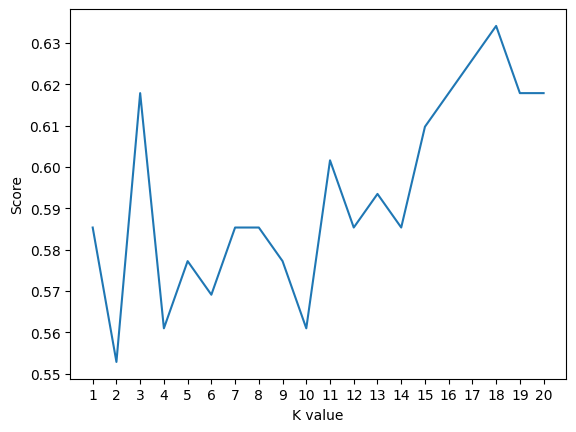

KNN best accuracy: 63.41%


In [143]:
score_knn = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    score_knn.append(knn.score(x_test, y_test))

plt.plot(range(1,21), score_knn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(score_knn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

In [144]:
svc = SVC(kernel='rbf', max_iter=500)
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123

[[ 0 43]
 [ 0 80]]
SVC accuracy: 65.04%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0

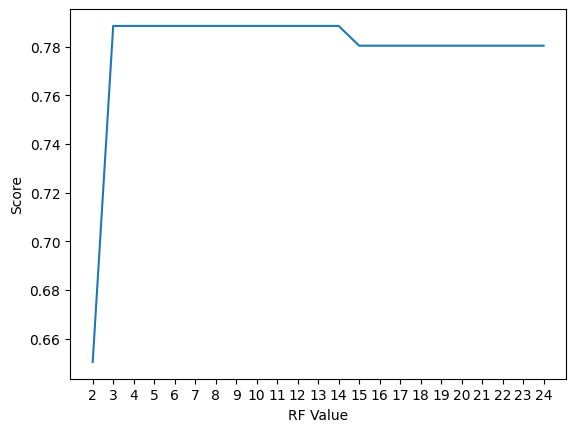

Random Forest Accuracy:  78.86%


In [145]:
score_rf = []
for i in range(2,25):
    rfc = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    rfc.fit(x_train, y_train)
    score_rf.append(rfc.score(x_test, y_test))

plt.plot(range(2,25), score_rf)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(score_rf)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

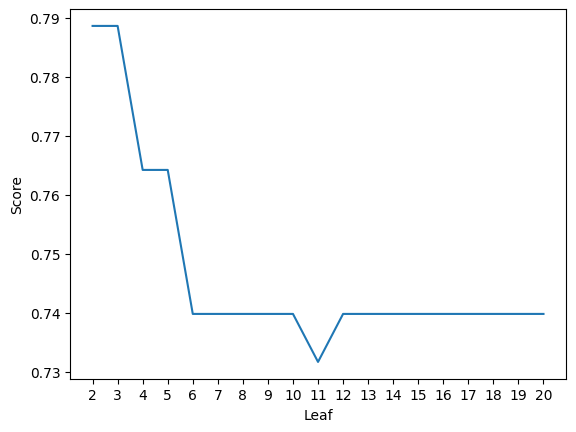

Decision Tree Accuracy: 78.86%


In [146]:
score_dt = []
for i in range(2,21):
    dtc = DecisionTreeClassifier(max_leaf_nodes=i)
    dtc.fit(x_train, y_train)
    score_dt.append(dtc.score(x_test, y_test))

plt.plot(range(2,21), score_dt)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(score_dt)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

In [147]:
comparison = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors',
                                  'SVM','Decision Tree',
                                  'Random Forest',],
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100,
                                      DTAcc*100,
                                     RFAcc*100, ]})
comparison.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,78.861789
3,Decision Tree,78.861789
4,Random Forest,78.861789
2,SVM,65.040650
1,K Neighbors,63.414634


## ***Going forward with Decision Tree in order to calculate the y_pred for out test loan dataset***

In [148]:
y_pred1 = dtc.predict(x_test)

In [ ]:
y_pred1

In [149]:
dtc = DecisionTreeClassifier()
model= dtc.fit(x_train, y_train)

In [157]:
loan_test1 = loan_test.drop('Loan_ID',axis=1)

In [163]:
y1=model.predict(loan_test1)
y1

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,

In [159]:
X = loan_test['Loan_ID']

In [160]:
loan_test = pd.concat([loan_test1,X],axis = 1)

In [161]:
loan_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Loan_ID
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,4.700480,LP001015
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,4.836282,LP001022
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,5.337538,LP001031
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2,4.605170,LP001035
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,4.356709,LP001051
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2,4.727388,LP002971
363,1,1,0,0,0,4158,709,115.0,360.0,1.0,2,4.744932,LP002975
364,1,0,0,0,0,3250,1993,126.0,360.0,1.0,1,4.836282,LP002980
365,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0,5.062595,LP002986


In [164]:
loan_test['Loan_Status'] =[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]

In [165]:
loan_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Loan_ID,Loan_Status
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,4.700480,LP001015,1
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,4.836282,LP001022,1
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,5.337538,LP001031,1
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2,4.605170,LP001035,1
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,4.356709,LP001051,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2,4.727388,LP002971,1
363,1,1,0,0,0,4158,709,115.0,360.0,1.0,2,4.744932,LP002975,1
364,1,0,0,0,0,3250,1993,126.0,360.0,1.0,1,4.836282,LP002980,1
365,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0,5.062595,LP002986,1


In [166]:
loan_test['Loan_Status'] =loan_test['Loan_Status'].replace({1: 'Y', 0: 'N'})

In [167]:
loan_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Loan_ID,Loan_Status
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,4.700480,LP001015,Y
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,4.836282,LP001022,Y
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,5.337538,LP001031,Y
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2,4.605170,LP001035,Y
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,4.356709,LP001051,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2,4.727388,LP002971,Y
363,1,1,0,0,0,4158,709,115.0,360.0,1.0,2,4.744932,LP002975,Y
364,1,0,0,0,0,3250,1993,126.0,360.0,1.0,1,4.836282,LP002980,Y
365,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0,5.062595,LP002986,Y


In [168]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [169]:
loan_test_result = pd.DataFrame(loan_test)

In [170]:
loan_test_result.to_csv('/content/drive/My Drive/mydata.csv', index=False)


In [172]:
len(loan_test.columns)

14

In [173]:
len(loan_train.columns)

14

In [ ]:
#@title
